In [1]:
import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image

In [2]:
! cat data/demo.yaml

DATASET:
    NAME: MyDeeplenstronomyDataset
    PARAMETERS:
        SIZE: 100
        OUTDIR: MySimulationResults

COSMOLOGY:
    PARAMETERS:
        H0: 70
        Om0: 0.3

IMAGE:
    PARAMETERS:
        exposure_time: 90
        numPix: 100
        pixel_scale: 0.263
        psf_type: 'GAUSSIAN'
        read_noise: 7
        ccd_gain: 6.083

SURVEY:
    PARAMETERS:
        BANDS: g,r,i,z,Y
        seeing: 0.9
        magnitude_zero_point: 30.0
        sky_brightness: 23.5
        num_exposures: 10

SPECIES:
    GALAXY_1:
        NAME: LENS
        LIGHT_PROFILE_1:
            NAME: SERSIC_ELLIPSE
            PARAMETERS:
                magnitude: 19.5
                center_x: 0.0
                center_y: 0.0
                R_sersic: 10
                n_sersic: 4
                e1: 0.2
                e2: -0.1
        LIGHT_PROFILE_2:
            NAME: SERSIC_ELLIPSE
            PARAMETERS:
                magnitude: 18.0
                center_x: 0.0
                center_y: 0

In [3]:
dataset_demo = dl.make_dataset('data/demo.yaml',verbose=True)

Entering main organization loop
Organizing CONFIGURATION_1
Organizing CONFIGURATION_2
Organizing CONFIGURATION_3
Organizing CONFIGURATION_4
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 1 S         
Generating images for CONFIGURATION_2
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S         
Generating images for CONFIGURATION_3
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S         
Generating images for CONFIGURATION_4
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 1 S         


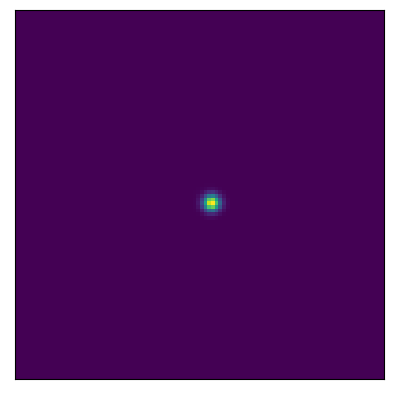

In [4]:
view_image(dataset_demo.CONFIGURATION_1_images[0][0])

In the demo.yaml file, the default cosmology is 'FlatLambdaCDM'. There is also an option for specifying a cosmology as shown below.

H0 and Om0 have to be specified for 'FlatLambdaCDM'.

These parameters can either be fixed or they can be drawn from a distribution.

In [5]:
! cat data/demo_cosmology.yaml

DATASET:
    NAME: MyDeeplenstronomyDataset
    PARAMETERS:
        SIZE: 10
        OUTDIR: MySimulationResults

COSMOLOGY:
    NAME: 'wCDM'
    # NAME: 'FlatLambdaCDM'
    PARAMETERS:
        H0: 
          DISTRIBUTION:
                  NAME: uniform
                  PARAMETERS:
                      minimum: 69.0
                      maximum: 72.0
        w0: 
          DISTRIBUTION:
                  NAME: uniform
                  PARAMETERS:
                      minimum: -1.0
                      maximum: -0.8
        Ode0: 0.7
        Om0: 0.3

IMAGE:
    PARAMETERS:
        exposure_time: 90
        numPix: 100
        pixel_scale: 0.263
        psf_type: 'GAUSSIAN'
        read_noise: 7
        ccd_gain: 6.083

SURVEY:
    PARAMETERS:
        BANDS: g
        seeing: 0.9
        magnitude_zero_point: 30.0
        sky_brightness: 23.5
        num_exposures: 10

SPECIES:
    GALAXY_1:
        NAME: LENS
        LIGHT_PROFILE_1:
            NAME: SERSIC_ELLIPSE
            

In this config file, all the parameters except the comsology is drawn from a distribution for simplicity. 

The available cosmologies in Deeplenstronomy are 'FlatLambdaCDM', 'LambdaCDM', 'FlatwCDM', and 'wCDM'. 

These options can be given through 'NAME' under 'COSMOLOGY' in the yaml file. If 'NAME' is not specified, the default option is 'FlatLambdaCDM'

The input parameters to be given for each cosmology is detailed in astropy cosmology classes https://docs.astropy.org/en/stable/cosmology/index.html#module-astropy.cosmology

For example:

- The yaml file should have H0, Om0 for 'FlatLambdaCDM' either as constants or as distributions and the other parametrs are optional
- The yaml file should have H0, Om0, Ode0 for 'wCDM'



In [6]:
dataset = dl.make_dataset('data/demo_cosmology.yaml',verbose=True)

Entering main organization loop
Organizing CONFIGURATION_1
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S         


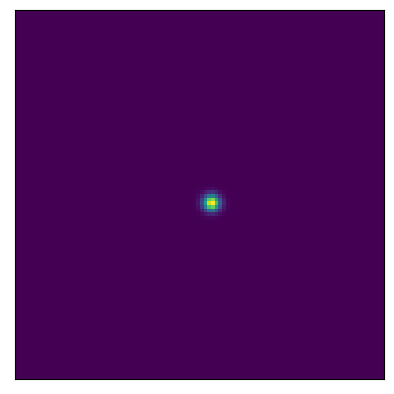

In [7]:
view_image(dataset.CONFIGURATION_1_images[0][0])